In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus= False)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [9]:
group = df.groupby('Survived').size()
group

Survived
0    549
1    342
dtype: int64

In [10]:
df.value_counts('Survived')

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
df.value_counts('Survived', normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

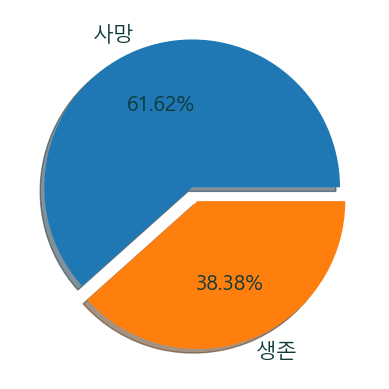

In [12]:
labels = ['사망', '생존']
plt.pie(group.values, labels=labels, shadow=True, 
        autopct='%.2f%%', explode=[0.05]*len(group), 
        textprops={'color':"#0E3A3A", 'fontsize':'15'})
plt.show()

In [13]:
import seaborn as sns

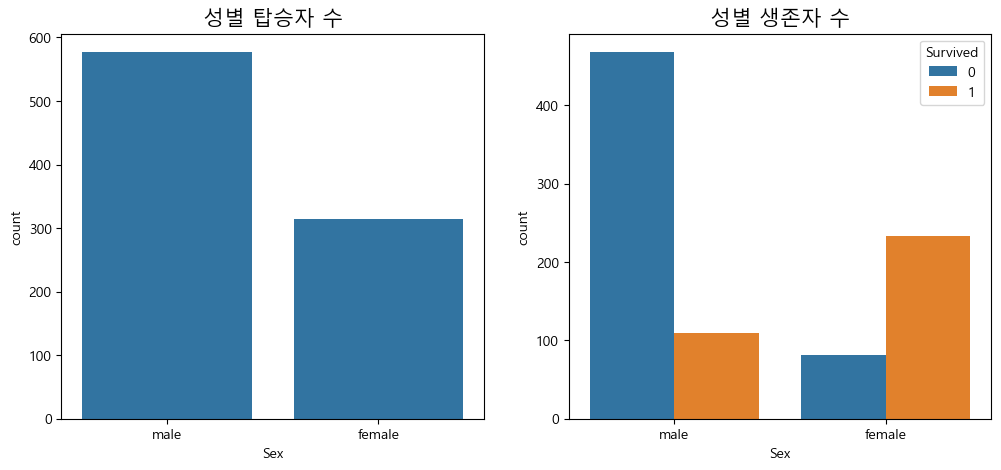

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].set_title('성별 탑승자 수', size=15)
sns.countplot(x='Sex', data=df, ax=axs[0])

axs[1].set_title('성별 생존자 수', size=15)
sns.countplot(x='Sex', hue='Survived', data=df, ax=axs[1])
plt.show()

In [15]:
#성별 생존율
gender = df.groupby('Sex').size().to_frame('탑승인원')
gender

,탑승인원
Sex,
female,314
male,577


In [16]:
filt = df['Survived'] == 1
gender_survived = df[filt].groupby('Sex').size().to_frame('생존자수')
gender_survived

,생존자수
Sex,
female,233
male,109


In [17]:
join = gender_survived.join(gender)
join

,생존자수,탑승인원
Sex,,
female,233,314
male,109,577


In [18]:
join['생존율'] = join['생존자수']/join['탑승인원']
join

,생존자수,탑승인원,생존율
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


In [19]:
#탑승 클래스별 생존율
df['Pclass'].unique()

array([3, 1, 2])

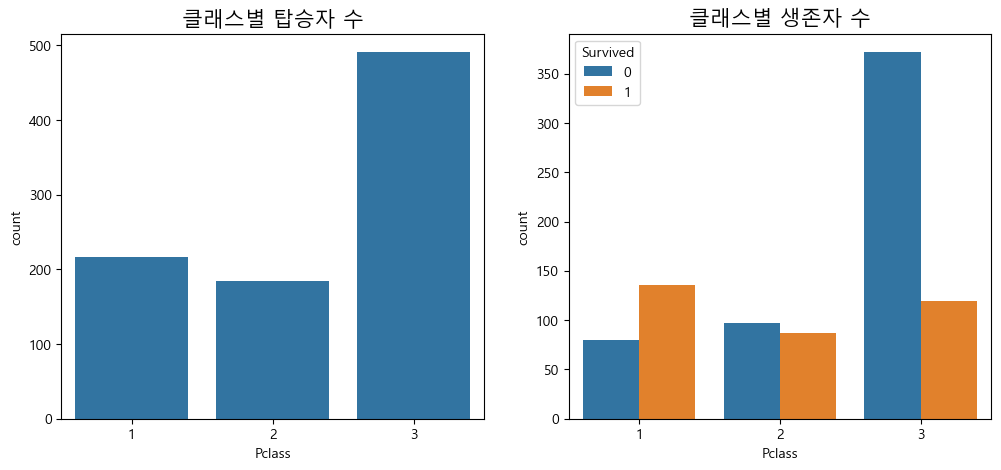

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].set_title('클래스별 탑승자 수', size=15)
sns.countplot(x='Pclass', data=df, ax=axs[0])

axs[1].set_title('클래스별 생존자 수', size=15)
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axs[1])
plt.show()

In [21]:
pclass = df.groupby('Pclass').size().to_frame('탑승자수')
pclass

,탑승자수
Pclass,
1,216
2,184
3,491


In [22]:
filt = df['Survived']==1
pclass_survived = df[filt].groupby('Pclass').size().to_frame('생존자수')
pclass_survived

,생존자수
Pclass,
1,136
2,87
3,119


In [23]:
join = pclass.join(pclass_survived)
join

,탑승자수,생존자수
Pclass,,
1,216,136
2,184,87
3,491,119


In [24]:
join['생존율'] = join['생존자수']/join['탑승자수']
join

,탑승자수,생존자수,생존율
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


In [25]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
sns.set_theme(font = 'malgun gothic', style='dark')

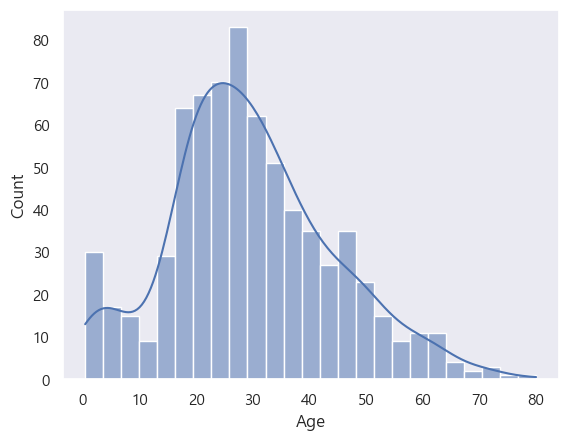

In [27]:
sns.histplot(data=df, x='Age', bins=25, kde=True)
plt.show()

In [28]:
#연령대별 사망자, 생존자 그래프
survived = df[df['Survived']==1]
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
dead = df[df['Survived']==0]
dead.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


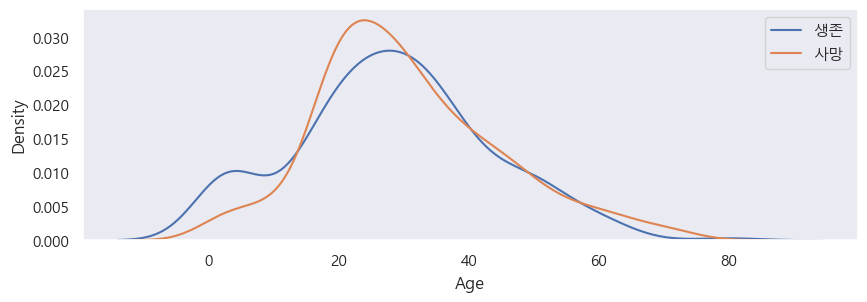

In [30]:
plt.figure(figsize=(10,3))
sns.kdeplot(survived['Age'], label='생존')
sns.kdeplot(dead['Age'], label='사망')
plt.legend()
plt.show()

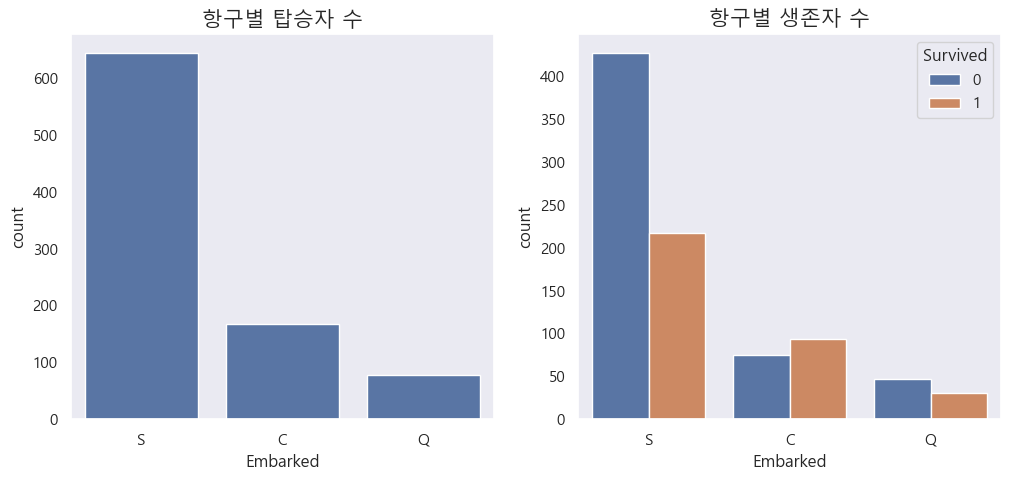

In [31]:
#탑승 항구별 생존율
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].set_title('항구별 탑승자 수', size=15)
sns.countplot(x='Embarked', data=df, ax=axs[0])

axs[1].set_title('항구별 생존자 수', size=15)
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axs[1])
plt.show()

In [32]:
embarked = df.groupby('Embarked').size().to_frame('탑승자수')
embarked

,탑승자수
Embarked,
C,168
Q,77
S,644


In [33]:
embarked_survived = df[df['Survived']==1].groupby('Embarked').size().to_frame('생존자수')
embarked_survived

,생존자수
Embarked,
C,93
Q,30
S,217


In [34]:
join = embarked.join(embarked_survived)
join

,탑승자수,생존자수
Embarked,,
C,168,93
Q,77,30
S,644,217


In [35]:
join['생존율'] = join['생존자수']/join['탑승자수']
join

,탑승자수,생존자수,생존율
Embarked,,,
C,168,93,0.553571
Q,77,30,0.389610
S,644,217,0.336957


In [36]:
c1 = df[df['Pclass']==1].value_counts('Embarked')
c1

Embarked
S    127
C     85
Q      2
Name: count, dtype: int64

In [37]:
c2 = df[df['Pclass']==2].value_counts('Embarked')
c2

Embarked
S    164
C     17
Q      3
Name: count, dtype: int64

In [38]:
c3 = df[df['Pclass']==3].value_counts('Embarked')
c3

Embarked
S    353
Q     72
C     66
Name: count, dtype: int64

In [39]:
pclass = pd.DataFrame([c1, c2, c3])
pclass

Embarked,S,C,Q
count,127,85,2
count,164,17,3
count,353,66,72


In [40]:
pclass.index=['1등급', '2등급', '3등급']
pclass

Embarked,S,C,Q
1등급,127,85,2
2등급,164,17,3
3등급,353,66,72


In [41]:
pclass.columns=['S항구', 'C항구', 'Q항구']
pclass

,S항구,C항구,Q항구
1등급,127,85,2
2등급,164,17,3
3등급,353,66,72


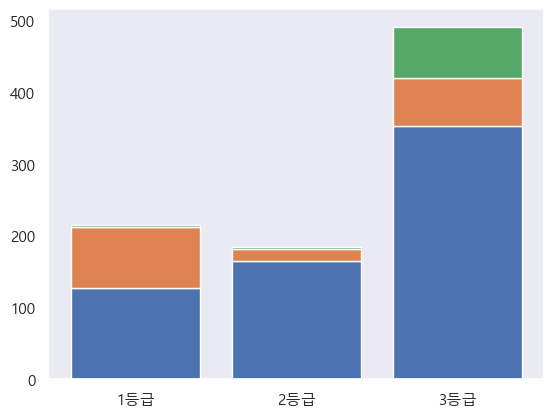

In [42]:
plt.bar(pclass.index, pclass['S항구'])
plt.bar(pclass.index, pclass['C항구'], bottom=pclass['S항구'])
plt.bar(pclass.index, pclass['Q항구'], bottom=pclass['S항구'] + pclass['C항구'])
plt.show()

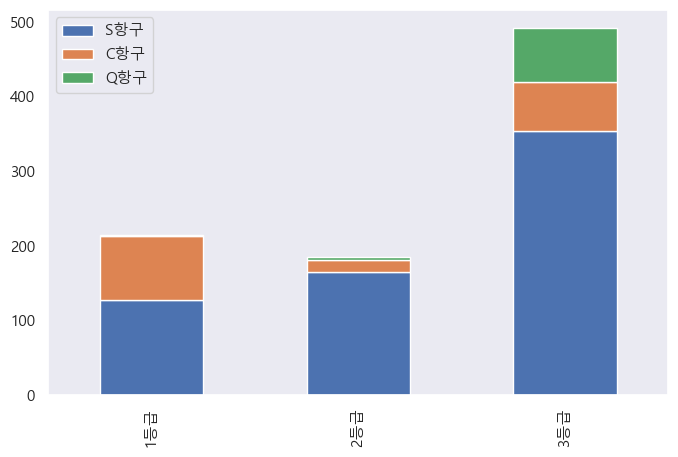

In [43]:
fig, ax = plt.subplots(figsize=(8,5))
pclass.plot(kind = 'bar', stacked = True, ax=ax)
plt.show()

In [48]:
es = df[df['Embarked']=='S'].value_counts('Pclass')
ec = df[df['Embarked']=='C'].value_counts('Pclass')
eq = df[df['Embarked']=='Q'].value_counts('Pclass')
embarked = pd.DataFrame([es, ec, eq])
embarked.index = ['1등급', '2등급', '3등급']
embarked.columns = ['S항구', 'C항구', 'Q항구']
embarked

,S항구,C항구,Q항구
1등급,353,164,127
2등급,66,17,85
3등급,72,3,2


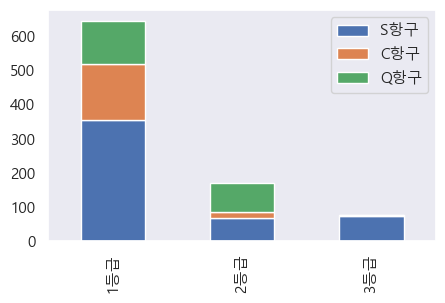

In [49]:
fig, ax = plt.subplots(figsize=(5,3))
embarked.plot(kind='bar', stacked=True, ax=ax)
plt.show()